# Mean Shift
- 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동.
- 특정 대역폭(bandwidth)을 갖고 최초의 확률 밀도 중심 C0 내에서 데이터의 확률 밀도 중심이 더 높은 곳으로 중심을 이동
- pdf 함수가 피크인 점을 군집 중심점으로 선정
- KDE(Kernel Density Estimation)를 이용하여 pdf를 찾는다.
- 군집의 개수를 지정할 필요가 없다.
- bandwidth의 크기에 따라 알고리즘 자체에 군집의 개수를 최적으로 정한다.

![image](https://t1.daumcdn.net/cfile/tistory/2366BF4051930CE922)

# make_blobs example

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

In [3]:
X,y = make_blobs(n_samples = 200, n_features=2, centers = 3, cluster_std=0.8, random_state=0)

meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels)) #8개로 군집화

[0 1 2 3 4 5 6 7]


In [5]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels)) #3개로 군집화

[0 1 2]


bandwidth 값에 큰 영향

## 최적 bandwidth 찾기
- estimate_bandwidth()

In [20]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.2)
print('bandwidth' , round(bandwidth,3))

bandwidth 1.444


In [21]:
import pandas as pd

In [22]:
cluster_df = pd.DataFrame(X, columns = ['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [27]:
meanshift = MeanShift(bandwidth)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels)) #오잉? 왜 4갤까 ㅎㅎ 이거 성능이 별로 안 좋은듯

[0 1 2 3]


In [28]:
import matplotlib.pyplot as plt

In [30]:
cluster_df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_ #중심의 좌표
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','x','*']

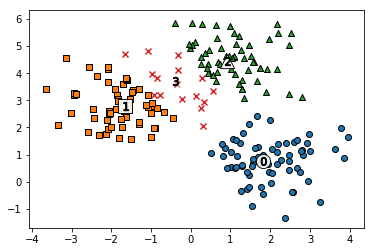

In [32]:
for label in unique_labels :
    label_cluster = cluster_df[cluster_df.meanshift_label == label]
    center_x_y = centers[label]
    
    plt.scatter(label_cluster['ftr1'], label_cluster['ftr2'], edgecolors='k',marker = markers[label])
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

In [34]:
cluster_df.groupby('target')['meanshift_label'].value_counts()

target  meanshift_label
0       2                  59
        3                   8
1       0                  67
2       1                  58
        3                   8
Name: meanshift_label, dtype: int64